# Analysis of COMPAS Scores Dataset
## 1. Feature Engineering, EDA, and Data Visualization
### Dataset Overview
The dataset contains criminal defendant records with COMPAS risk assessment scores, including:
- Demographic information (`age`, `race`, `sex`)
- Criminal history (prior counts, charge details)
- COMPAS scores (decile scores, score text categories)
- Recidivism outcomes (`two_year_recid`)
### Key Features to Analyze:
1. Demographic Features:
  - `age` and `age_cat` (age categories)
  - `race`
  - `sex`
2. Criminal History Features:
  - `priors_count`
  - `juv_fel_count`, `juv_misd_count`, `juv_other_count`
  - `c_charge_degree` (charge degree - felony/misdemeanor)
3. COMPAS Assessment Features:
  - `decile_score` (1-10)
  - `score_text` (Low/Medium/High)
  - `v_decile_score` (violence risk score)
  - `v_score_text` (violence risk category)
4. Outcome Variable:
  - `two_year_recid` (1 if recidivated within 2 years, 0 if not)
### Feature Engineering

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('compas-scores-two-years.csv')

# Feature engineering
# Convert dates to datetime
df['compas_screening_date'] = pd.to_datetime(df['compas_screening_date'])
df['dob'] = pd.to_datetime(df['dob'])

# Calculate days since screening
df['days_since_screening'] = (pd.to_datetime('today') - df['compas_screening_date']).dt.days

# Create binary flags for score categories
df['high_risk'] = (df['score_text'] == 'High').astype(int)
df['violent_high_risk'] = (df['v_score_text'] == 'High').astype(int)

# Create age bins
df['age_bin'] = pd.cut(df['age'], bins=[0, 25, 45, 100], labels=['Young', 'Adult', 'Elderly'])

df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,out_custody,priors_count.1,start,end,event,two_year_recid,days_since_screening,high_risk,violent_high_risk,age_bin
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,2014-07-14,0,0,327,0,0,4258,0,0,Elderly
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-02-05,0,9,159,1,1,4457,0,0,Adult
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,2013-06-16,4,0,63,0,1,4380,0,0,Young
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,NaN,1,0,1174,0,0,4471,1,0,Young
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,NaN,2,0,1102,0,0,4399,0,0,Adult


### Exploratory Data Analysis (EDA)

In [23]:
# Basic info
print(df.info())
print(df.describe())

# Missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       7214 non-null   int64         
 1   name                     7214 non-null   object        
 2   first                    7214 non-null   object        
 3   last                     7214 non-null   object        
 4   compas_screening_date    7214 non-null   datetime64[ns]
 5   sex                      7214 non-null   object        
 6   dob                      7214 non-null   datetime64[ns]
 7   age                      7214 non-null   int64         
 8   age_cat                  7214 non-null   object        
 9   race                     7214 non-null   object        
 10  juv_fel_count            7214 non-null   int64         
 11  decile_score             7214 non-null   int64         
 12  juv_misd_count           7214 non-

### Data Visualization
1. Distribution of COMPAS scores

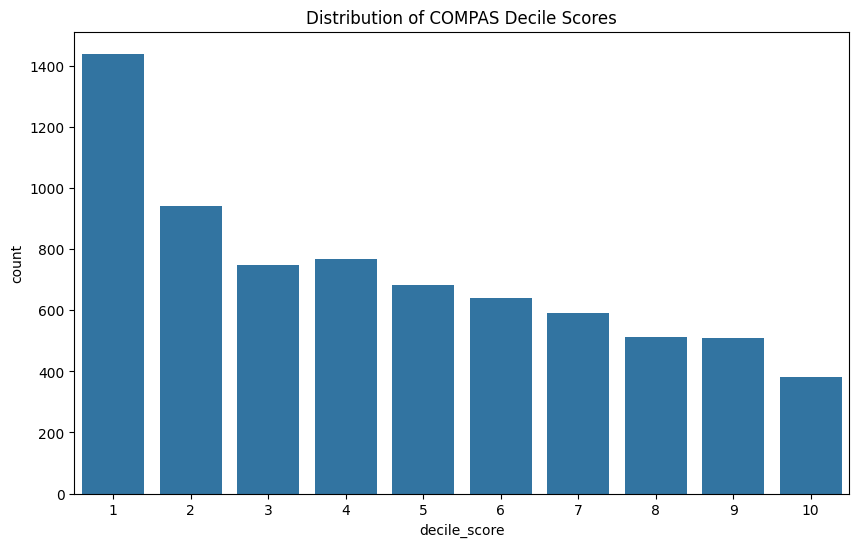

In [24]:
# 1. Distribution of COMPAS scores
plt.figure(figsize=(10, 6))
sns.countplot(x='decile_score', data=df)
plt.title('Distribution of COMPAS Decile Scores')
plt.show()

2. Recidivism by race

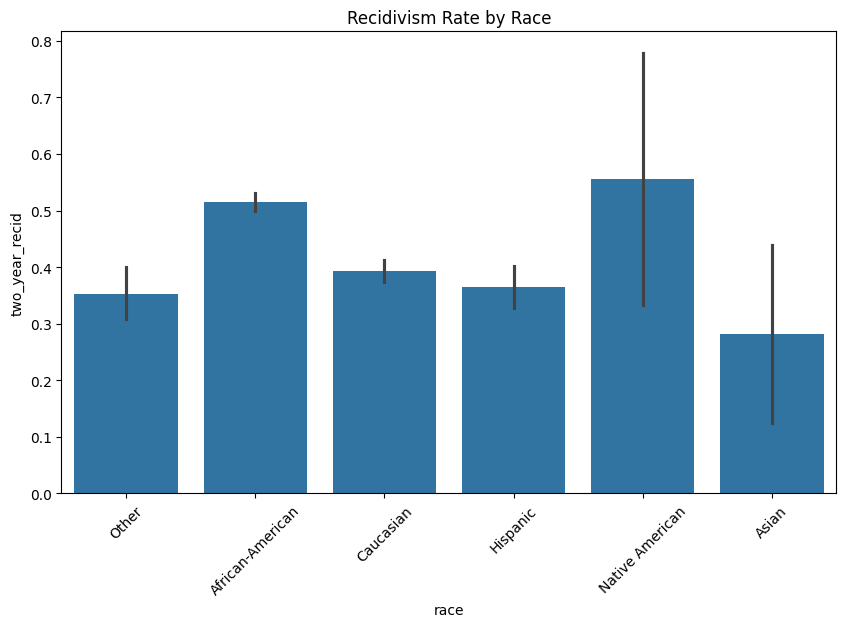

In [25]:
# 2. Recidivism by race
plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='two_year_recid', data=df)
plt.title('Recidivism Rate by Race')
plt.xticks(rotation=45)
plt.show()

3. Correlation between priors and COMPAS scores

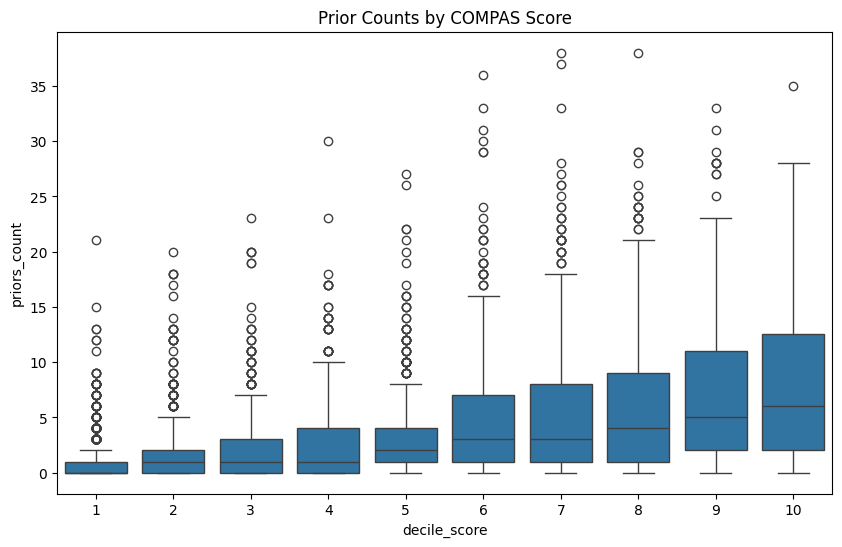

In [26]:
# 3. Correlation between priors and COMPAS scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='decile_score', y='priors_count', data=df)
plt.title('Prior Counts by COMPAS Score')
plt.show()

4. Recidivism by age category

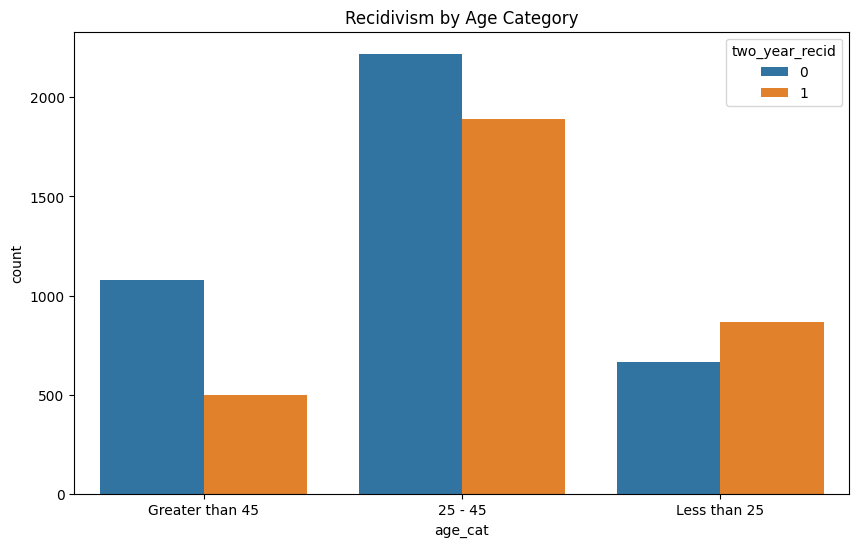

In [27]:
# 4. Recidivism by age category
plt.figure(figsize=(10, 6))
sns.countplot(x='age_cat', hue='two_year_recid', data=df)
plt.title('Recidivism by Age Category')
plt.show()

5. COMPAS score accuracy

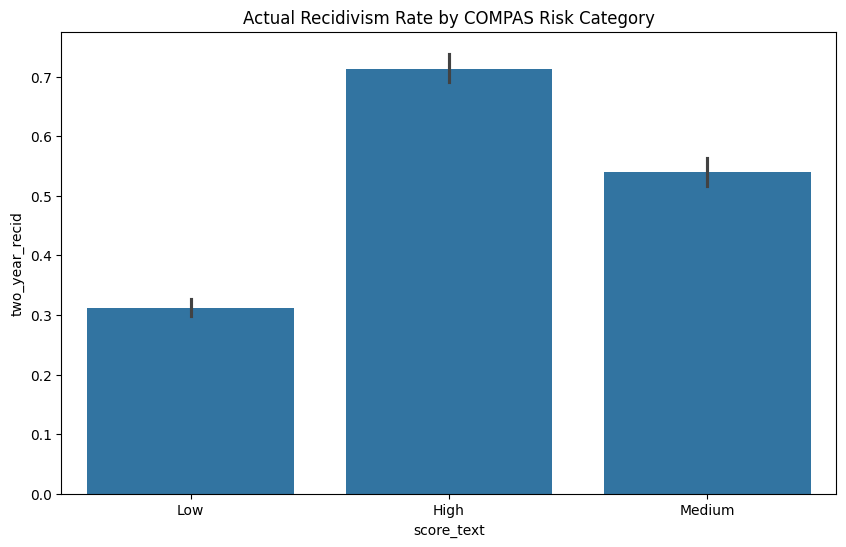

In [28]:
# 5. COMPAS score accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='score_text', y='two_year_recid', data=df)
plt.title('Actual Recidivism Rate by COMPAS Risk Category')
plt.show()

### Matriks Evaluasi Akurasi, Presisi, Recall, F1-Score, dan ROC-AUC.

Berikut adalah semua **rumus evaluasi klasifikasi** yang digunakan dalam kode sebelumnya, lengkap dengan penjelasan:

1. **Akurasi (Accuracy)**  
Ukuran seberapa banyak prediksi yang benar dibanding total prediksi.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- $TP$: True Positive  
- $TN$: True Negative  
- $FP$: False Positive  
- $FN$: False Negative  

2. **Presisi (Precision)**  
Mengukur seberapa banyak prediksi positif yang benar-benar positif.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- Presisi tinggi berarti sedikit **False Positive**.

3. **Recall (Sensitivity / True Positive Rate)**  
Seberapa banyak kasus positif yang berhasil dikenali model.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- Recall tinggi berarti sedikit **False Negative**.

4. **F1 Score**  
Rata-rata harmonik dari presisi dan recall, berguna saat terjadi ketidakseimbangan kelas.

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- F1 mendekati 1 berarti presisi dan recall seimbang dan tinggi.

5. **ROC-AUC (Receiver Operating Characteristic – Area Under Curve)**  
Mengukur kemampuan model membedakan antara kelas. Nilainya antara 0.5 (acak) hingga 1.0 (sempurna).

$$
\text{AUC} = \int_0^1 \text{TPR}(FPR) \, dFPR
$$

Diukur dengan:
- $TPR$ (Recall): $\frac{TP}{TP + FN}$
- $FPR$: $\frac{FP}{FP + TN}$

Accuracy: 0.65
Precision: 0.61
Recall: 0.63
F1 Score: 0.62
AUC-ROC: 0.70


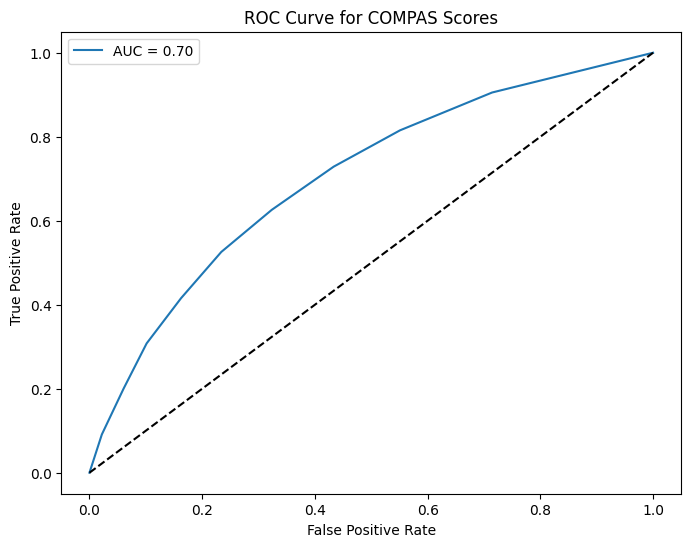

In [30]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve)

# Assuming y_true is actual recidivism and y_pred is COMPAS prediction (1 if High/Medium, 0 if Low)
y_true = df['two_year_recid']
y_pred = (df['score_text'] != 'Low').astype(int)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, df['decile_score']/10)  # Normalize decile to 0-1

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, df['decile_score']/10)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for COMPAS Scores')
plt.legend()
plt.show()

### Analisis Hasil Matriks Evaluasi

1. **Accuracy (Akurasi: 0.65)**
- **Interpretasi**: Model memprediksi dengan benar 65% dari total kasus.
- **Analisis**:
  - Nilai 65% menunjukkan performa yang sedikit lebih baik daripada tebakan acak (50%), tapi tidak terlalu tinggi.
  - Di dunia nyata dengan dataset yang mungkin tidak seimbang (misalnya lebih banyak non-recidivis), accuracy bisa menyesatkan karena model mungkin hanya memprediksi kelas mayoritas.

2. **Precision (Presisi: 0.61)**
- **Interpretasi**: Dari semua prediksi "berisiko tinggi", hanya 61% yang benar-benar melakukan recidivism.
- **Analisis**:
  - Nilai yang cukup rendah menunjukkan banyak **false positive** - banyak orang yang diprediksi berisiko tinggi tapi tidak benar-benar melakukan recidivism.
  - Ini berimplikasi serius dalam konteks hukum karena bisa menyebabkan orang yang tidak berisiko mendapat hukuman lebih berat.

3. **Recall (Sensitifitas: 0.63)**
- **Interpretasi**: Model berhasil mengidentifikasi 63% dari semua kasus recidivism yang sebenarnya.
- **Analisis**:
  - Nilai ini menunjukkan **37% false negative** - banyak pelaku recidivism yang lolos dari prediksi risiko tinggi.
  - Dalam konteks keamanan publik, ini berbahaya karena pelaku potensial tidak teridentifikasi.

4. **F1 Score (0.62)**
- **Interpretasi**: Rata-rata harmonik dari precision dan recall.
- **Analisis**:
  - Nilai yang sedang menunjukkan trade-off antara precision dan recall.
  - F1 yang lebih dekat ke precision (0.61) daripada recall (0.63) menunjukkan model sedikit lebih baik dalam menghindari false positive daripada false negative.

5. **AUC-ROC (0.70)**
- **Interpretasi**: Kemampuan model membedakan recidivis dan non-recidivis adalah 70%.
- **Analisis**:
  - Nilai 0.7 termasuk kategori "acceptable" tapi tidak "excellent".
  - ROC curve yang menghasilkan AUC 0.7 menunjukkan model memiliki beberapa daya prediktif, tapi masih banyak ruang untuk improvement.

**Analisis**:
1. **Kinerja Keseluruhan**:
   - Model memiliki kemampuan prediktif yang moderat (AUC 0.7) dengan akurasi yang terbatas (65%).
   - Trade-off antara precision dan recall menunjukkan model tidak unggul di salah satu aspek.

2. **Bias Potensial**:
   - Precision yang rendah (61%) mengindikasikan risiko ketidakadilan - banyak orang tidak berisiko tapi diklasifikasikan berisiko.
   - Recall yang tidak tinggi (63%) menunjukkan sistem mungkin melewatkan banyak pelaku sebenarnya.

3. **Implikasi Praktis**:
   - Dalam konteks peradilan pidana, false positive bisa menyebabkan orang yang tidak berisiko mendapat hukuman lebih berat.
   - False negative bisa membahayakan masyarakat karena pelaku berisiko tidak teridentifikasi.

4. **Perbandingan dengan Sistem Ideal**:
   - Sistem ideal untuk keputusan hukum seharusnya memiliki precision sangat tinggi (minimal >80%) untuk meminimalkan ketidakadilan.
   - Recall yang lebih tinggi (>70%) juga diinginkan untuk keamanan publik.

### **Rekomendasi Perbaikan**:
1. **Feature Engineering**:
   - Tambahkan variabel yang lebih prediktif seperti riwayat pekerjaan, pendidikan, atau dukungan sosial.
   - Analisis bias berdasarkan demografi (race, usia, gender).

2. **Threshold Adjustment**:
   - Naikkan threshold klasifikasi "high risk" jika ingin mengurangi false positive (tingkatkan precision).
   - Turunkan threshold jika ingin menangkap lebih banyak recidivis (tingkatkan recall).

3. **Model Alternatif**:
   - Coba algoritma lain seperti Random Forest atau Gradient Boosting yang mungkin bisa menangkap pola lebih kompleks.
   - Pertimbangkan teknik ensemble untuk meningkatkan performa.

4. **Interpretability**:
   - Gunakan SHAP values atau LIME untuk memahami kontribusi masing-masing fitur.
   - Pastikan model tidak mengandung bias tersembunyi terhadap kelompok tertentu.

**Kesimpulan**: Sistem COMPAS dalam evaluasi ini menunjukkan kemampuan prediktif yang moderat tetapi masih memiliki kelemahan signifikan dalam hal keadilan (precision) dan keamanan (recall). Perlu penyempurnaan lebih lanjut sebelum bisa diandalkan untuk keputusan hukum yang kritis.